<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.447246,21.748219,-105.570879,-22.375414,6.836940,-29.212354
1,0.0,1.0,71.716574,26.589642,108.755939,217.062155,383.671168,-166.609014
2,0.0,2.0,58.917419,87.538590,1252.603161,1409.059170,541.005801,868.053369
3,0.0,3.0,92.559114,86.245673,96.598541,285.403328,1108.840209,-823.436881
4,0.0,4.0,34.449513,25.611295,113.976246,184.037054,-260.242715,444.279769
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.750850,68.483481,-1099.838133,-948.603802,567.708814,-1516.312617
19996,999.0,16.0,72.816641,30.047052,-40.272487,72.591206,-441.111035,513.702241
19997,999.0,17.0,56.286863,98.196476,3597.625761,3762.109100,1594.786869,2167.322231
19998,999.0,18.0,30.347376,56.359620,582.612618,679.319614,888.501526,-209.181912


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    51.447246  21.748219  -105.570879   -22.375414     6.836940   
      1.0    71.716574  26.589642   108.755939   217.062155   383.671168   
      2.0    58.917419  87.538590  1252.603161  1409.059170   541.005801   
      3.0    92.559114  86.245673    96.598541   285.403328  1108.840209   
      4.0    34.449513  25.611295   113.976246   184.037054  -260.242715   
...                ...        ...          ...          ...          ...   
999.0 15.0   72.750850  68.483481 -1099.838133  -948.603802   567.708814   
      16.0   72.816641  30.047052   -40.272487    72.591206  -441.111035   
      17.0   56.286863  98.196476  3597.625761  3762.109100  1594.786869   
      18.0   30.347376  56.359620   582.612618   679.319614   888.501526   
      19.0   49.694871  90.983038  1785.882788  1936.560697  1504.935386   

                   e_hat  
rep   index               
0.0   0.0     -29.212354  
      1.0    -166.609014  
      2.0     868.053369  
      3.0    -823.436881  
      4.0     444.279769  
...                  ...  
999.0 15.0  -1516.312617  
      16.0    513.702241  
      17.0   2167.322231  
      18.0   -209.181912  
      19.0    431.625311  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    51.447246  21.748219  -105.570879   -22.375414     6.836940   
      1.0    71.716574  26.589642   108.755939   217.062155   383.671168   
      2.0    58.917419  87.538590  1252.603161  1409.059170   541.005801   
      3.0    92.559114  86.245673    96.598541   285.403328  1108.840209   
      4.0    34.449513  25.611295   113.976246   184.037054  -260.242715   
...                ...        ...          ...          ...          ...   
999.0 15.0   72.750850  68.483481 -1099.838133  -948.603802   567.708814   
      16.0   72.816641  30.047052   -40.272487    72.591206  -441.111035   
      17.0   56.286863  98.196476  3597.625761  3762.109100  1594.786869   
      18.0   30.347376  56.359620   582.612618   679.319614   888.501526   
      19.0   49.694871  90.983038  1785.882788  1936.560697  1504.935386   

                   e_hat  
rep   index               
0.0   0.0     -29.212354  
      1.0    -166.609014  
      2.0     868.053369  
      3.0    -823.436881  
      4.0     444.279769  
...                  ...  
999.0 15.0  -1516.312617  
      16.0    513.702241  
      17.0   2167.322231  
      18.0   -209.181912  
      19.0    431.625311  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.447246,21.748219,-105.570879,-22.375414,6.836940,-29.212354
1,0.0,1.0,71.716574,26.589642,108.755939,217.062155,383.671168,-166.609014
2,0.0,2.0,58.917419,87.538590,1252.603161,1409.059170,541.005801,868.053369
3,0.0,3.0,92.559114,86.245673,96.598541,285.403328,1108.840209,-823.436881
4,0.0,4.0,34.449513,25.611295,113.976246,184.037054,-260.242715,444.279769
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.750850,68.483481,-1099.838133,-948.603802,567.708814,-1516.312617
19996,999.0,16.0,72.816641,30.047052,-40.272487,72.591206,-441.111035,513.702241
19997,999.0,17.0,56.286863,98.196476,3597.625761,3762.109100,1594.786869,2167.322231
19998,999.0,18.0,30.347376,56.359620,582.612618,679.319614,888.501526,-209.181912


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    51.447246  21.748219  -105.570879   -22.375414     6.836940   
      1.0    71.716574  26.589642   108.755939   217.062155   383.671168   
      2.0    58.917419  87.538590  1252.603161  1409.059170   541.005801   
      3.0    92.559114  86.245673    96.598541   285.403328  1108.840209   
      4.0    34.449513  25.611295   113.976246   184.037054  -260.242715   
...                ...        ...          ...          ...          ...   
999.0 15.0   72.750850  68.483481 -1099.838133  -948.603802   567.708814   
      16.0   72.816641  30.047052   -40.272487    72.591206  -441.111035   
      17.0   56.286863  98.196476  3597.625761  3762.109100  1594.786869   
      18.0   30.347376  56.359620   582.612618   679.319614   888.501526   
      19.0   49.694871  90.983038  1785.882788  1936.560697  1504.935386   

                   e_hat  
rep   index               
0.0   0.0     -29.212354  
      1.0    -166.609014  
      2.0     868.053369  
      3.0    -823.436881  
      4.0     444.279769  
...                  ...  
999.0 15.0  -1516.312617  
      16.0    513.702241  
      17.0   2167.322231  
      18.0   -209.181912  
      19.0    431.625311  

[20000 rows x 6 columns]

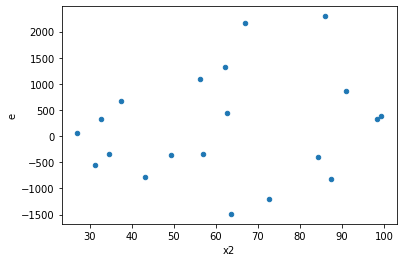

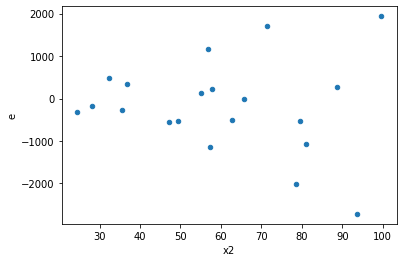

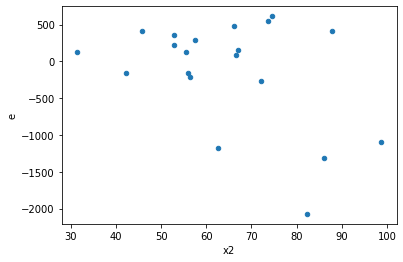

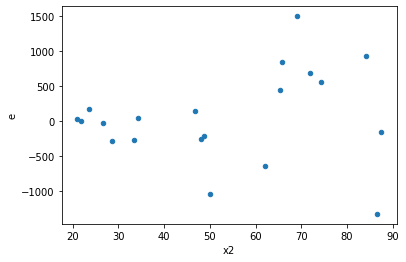

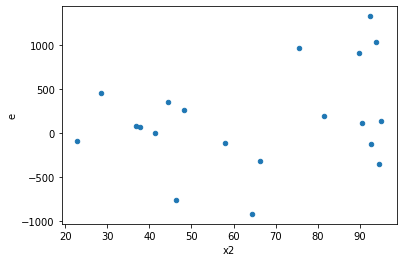

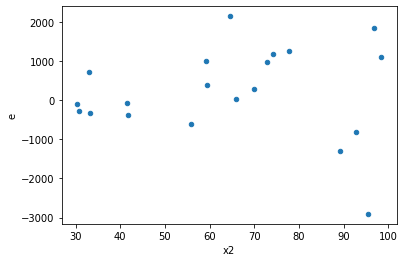

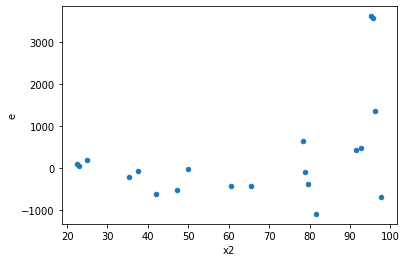

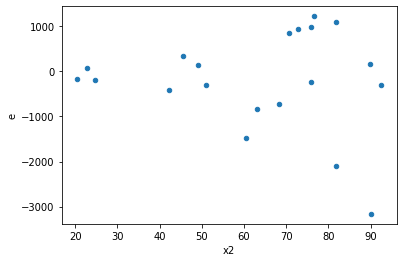

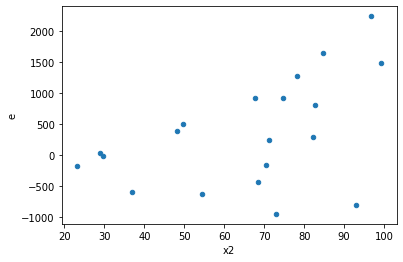

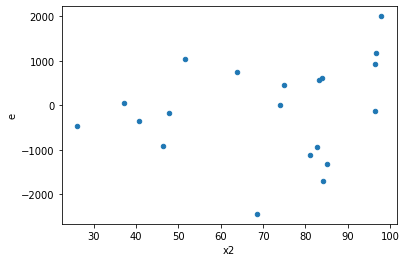

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,9.0,1861877.649830815,14456706.759767557,265982.52140440216,1606300.7510852842,6.0391214528079855,0.01566923870742376,0.9921653806462881,0.00783461935371188,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,2198571.4325413974,11394710.314504184,274821.4290676747,1424338.789313023,5.182779211013709,0.03169872041699984,0.9841506397915001,0.01584936020849992,Reject005=0 : Heteroscedasticity
3.0,8.0,8.0,926220.4722817541,4214163.622523556,115777.55903521927,526770.4528154446,4.549849359453175,0.04642211232504301,0.9767889438374785,0.023211056162521504,Reject005=0 : Heteroscedasticity
4.0,10.0,6.0,2956045.6101140315,11784077.404720895,295604.56101140316,1964012.900786816,6.644054794239297,0.030829387436486888,0.9845853062817566,0.015414693718243444,Reject005=0 : Heteroscedasticity
7.0,10.0,6.0,3188696.0146166636,6682900.686588381,318869.60146166635,1113816.7810980636,3.49301650578305,0.13924641656747316,0.9303767917162634,0.06962320828373658,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,507945.1333547797,10535536.495092262,63493.14166934746,1316942.0618865327,20.741485257490602,0.00028001122992127314,0.9998599943850394,0.00014000561496063657,Reject005=0 : Heteroscedasticity
10.0,7.0,9.0,2859949.232061932,15031536.345985537,408564.1760088474,1670170.705109504,4.08790296159822,0.05408779485258619,0.9729561025737069,0.027043897426293095,Reject005=1 : Homoscedasticity
12.0,7.0,9.0,1452116.40750899,1870042.4181427602,207445.20107271287,207782.49090475112,1.0016259225583146,0.9741745191326454,0.5129127404336773,0.4870872595663227,Reject005=1 : Homoscedasticity
14.0,8.0,8.0,1124859.9842520151,2956711.3319742815,140607.4980315019,369588.9164967852,2.6285149915261417,0.19323198018452858,0.9033840099077357,0.09661599009226429,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,7.0,7238153.5341947675,493940.67363462807,804239.2815771964,70562.95337637544,0.08773875511028781,0.001569901197340568,Reject005=0 : Heteroscedasticity
1.0,7.0,9.0,1861877.649830815,14456706.759767557,265982.52140440216,1606300.7510852842,6.0391214528079855,0.01566923870742376,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,2198571.4325413974,11394710.314504184,274821.4290676747,1424338.789313023,5.182779211013709,0.03169872041699984,Reject005=0 : Heteroscedasticity
3.0,8.0,8.0,926220.4722817541,4214163.622523556,115777.55903521927,526770.4528154446,4.549849359453175,0.04642211232504301,Reject005=0 : Heteroscedasticity
4.0,10.0,6.0,2956045.6101140315,11784077.404720895,295604.56101140316,1964012.900786816,6.644054794239297,0.030829387436486888,Reject005=0 : Heteroscedasticity
5.0,7.0,9.0,3165835.8818325973,514111.3250223978,452262.2688332282,57123.4805580442,0.12630609381900149,0.01240675939518869,Reject005=0 : Heteroscedasticity
6.0,7.0,9.0,18179986.061431352,224090.86119785797,2597140.8659187644,24898.984577539773,0.009587075119520524,2.546849774609114e-06,Reject005=0 : Heteroscedasticity
7.0,10.0,6.0,3188696.0146166636,6682900.686588381,318869.60146166635,1113816.7810980636,3.49301650578305,0.13924641656747316,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,507945.1333547797,10535536.495092262,63493.14166934746,1316942.0618865327,20.741485257490602,0.00028001122992127314,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    500
Reject005=1 : Homoscedasticity      500
Name: Result_test, dtype: int64